In [110]:
import pandas as pd
df = pd.read_csv(r'C:\Users\pbeal\OneDrive\Documentos\GitHub\ENS5172_20241\tabelas\dados_trabalho01.csv', encoding='ISO-8859-1')

df

,Fonte,PM,PM10,"PM2,5",NOX,SO2,CO,VOC
0,Chaminés,45.34,29.25,19.17,104.09,280.37,"3,506.15",6.12
1,Erosão Eólica - Pilhas,1.15,0.57,0.09,-,-,-,-
2,Fugitivas,0.44,1.04,0.18,0.04,1.01,0.55,22.25
3,Máquinas/Equipamentos,0.19,0.19,0.19,3.98,"<0,01",1.4,0.45
4,Navios,3.04,3.04,3.04,26.73,23.3,3.11,2.91
5,Tanques,-,-,-,-,-,-,<0.01
6,Transferências,8.54,2.25,0.37,-,-,-,-
7,Vias,14.96,2.99,0.68,0.36,0.01,0.12,0.06
8,TOTAL,73.65,39.34,23.72,135.19,304.7,"3,511.33",31.8


In [160]:
import matplotlib.pyplot as plt

atv = 1600000 #Considerando taxa de atividade em toneladas/ano
emis = fe['MP']*atv

#Somando dataframe
print(emis.sum())

#Criando a figura com Matplotlib
#Subplots com número de linhas igual ao numero de poluentes
fig, ax = plt.subplots(len(fe.columns) - 1, 1, sharex = True, figsize=(9, 15)) #sharex significa compartilhar o eixo x

#Look para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)): #a primeira coluna é a identificação da fonte
    ax[ii-1].bar(fe['Source'], fe.iloc[:,ii], color = 'black')
    ax[ii-1].set_xlabel('Processo', fontsize=8) #coloca o eixo x
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/ton)', fontsize=8)

    ax[ii-1].tick_params(axis='x', labelsize=8)
    ax[ii-1].tick_params(axis='y', labelsize=8)

    ax[ii-1].set_xticks(fe['Source'].index)
    ax[ii-1].set_xticklabels(fe['Source'], rotation=45, ha='right', fontsize=8)

# Adicionando valores acima das barras
    for bar, value in zip(ax[ii - 1].patches, fe.iloc[:, ii]):
        ax[ii - 1].annotate('{:.2f}'.format(value), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=8)

#Salva a fig na pasta figures
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

#O gráfico a seguir representa o fator de emissão para cada processo, basicamente pegou os dados da tabela e apresentou em figura

NameError: name 'fe' is not defined

In [141]:
#Taxa esta determinada em kg/h
import numpy as np
import pandas as pd

def criar_variabilidade_taxa_atividade(sazonalidade, amplitude, desvio_padrao_ruido, tamanho_amostra):
    # Criar sazonalidade mensal baseada nos dados de 2023
    sazonalidade_mensal = [0.9, 0.85, 0.95, 1.1, 1.2, 1.25, 1.3, 1.35, 1.4, 1.35, 1.2, 1.1]

    # Replicar a sazonalidade para o tamanho da amostra
    sazonalidade_amostra = np.tile(sazonalidade_mensal, tamanho_amostra // 12 + 1)[:tamanho_amostra]

    # Gerar ruído aleatório : ruído aleatório é um dos três componentes principais, juntamente com a deriva e a variação espacialmente correlacionada, que contribuem para a alteração no valor de uma variável sobre uma superfície
    ruido_aleatorio = np.random.normal(scale=desvio_padrao_ruido, size=tamanho_amostra)

    # Multiplicar a sazonalidade pelo fator de amplitude e adicionar o ruído aleatório
    taxa_atividade = sazonalidade_amostra * amplitude + ruido_aleatorio

    return taxa_atividade

# Exemplo de uso da função
sazonalidade = 12  # Fator de sazonalidade base
amplitude = 20  # Amplitude da variação sazonal
desvio_padrao_ruido = 5  # Desvio padrão do ruído aleatório
tamanho_amostra = 365  # Tamanho da amostra (um ano)

taxa_atividade = criar_variabilidade_taxa_atividade(sazonalidade, amplitude, desvio_padrao_ruido, tamanho_amostra)

# Criar DataFrame para visualização dos dados
datas = pd.date_range(start='2023-01-01', end='2023-12-31')
df = pd.DataFrame({'Data': datas, 'Atividade': taxa_atividade})

# Visualizar os dados
df

,Data,Atividade
0,2023-01-01,15.632752
1,2023-01-02,18.997378
2,2023-01-03,22.897627
3,2023-01-04,22.678836
4,2023-01-05,21.007431
...,...,...
360,2023-12-27,16.068905
361,2023-12-28,20.685621
362,2023-12-29,23.097448
363,2023-12-30,23.748355


In [142]:
df.iloc[:,0]


0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
360   2023-12-27
361   2023-12-28
362   2023-12-29
363   2023-12-30
364   2023-12-31
Name: Data, Length: 365, dtype: datetime64[ns]

In [143]:
import numpy as np
import pandas as pd

def criar_variabilidade_atividade():
    # Gerar datas para um ano
    datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')  # Frequência horária

df

,Data,Atividade
0,2023-01-01,15.632752
1,2023-01-02,18.997378
2,2023-01-03,22.897627
3,2023-01-04,22.678836
4,2023-01-05,21.007431
...,...,...
360,2023-12-27,16.068905
361,2023-12-28,20.685621
362,2023-12-29,23.097448
363,2023-12-30,23.748355


In [144]:

df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.day

df

,Data,Atividade,Ano,Mês,Dia
0,2023-01-01,15.632752,2023,1,1
1,2023-01-02,18.997378,2023,1,2
2,2023-01-03,22.897627,2023,1,3
3,2023-01-04,22.678836,2023,1,4
4,2023-01-05,21.007431,2023,1,5
...,...,...,...,...,...
360,2023-12-27,16.068905,2023,12,27
361,2023-12-28,20.685621,2023,12,28
362,2023-12-29,23.097448,2023,12,29
363,2023-12-30,23.748355,2023,12,30


(365,)


<Axes: >

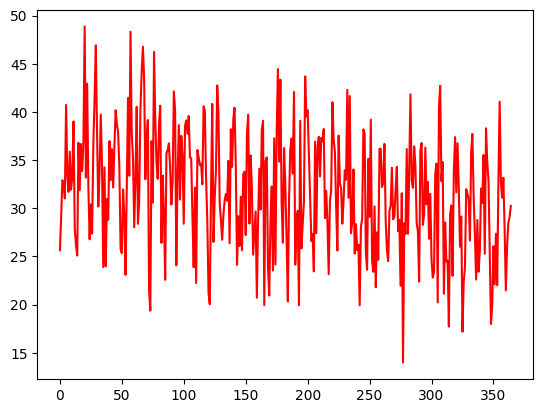

In [145]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360/1)))
df['timeSeries'] = 10*df['sazonal']+df['Atividade']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [123]:
df

,Data,Atividade,Ano,Mês,Dia,sazonal,timeSeries
0,2023-01-01 00:00:00,2.310097,2023,1,1,1.000000,12.310097
1,2023-01-01 01:00:00,2.921615,2023,1,1,1.000000,12.921612
2,2023-01-01 02:00:00,0.841506,2023,1,1,0.999999,10.841497
3,2023-01-01 03:00:00,7.909783,2023,1,1,0.999998,17.909762
4,2023-01-01 04:00:00,0.841506,2023,1,1,0.999996,10.841468
...,...,...,...,...,...,...,...
8732,2023-12-30 20:00:00,3.329806,2023,12,30,0.976051,13.090313
8733,2023-12-30 21:00:00,0.750000,2023,12,30,0.976202,10.512016
8734,2023-12-30 22:00:00,0.750000,2023,12,30,0.976352,10.513520
8735,2023-12-30 23:00:00,1.717768,2023,12,30,0.976502,11.482786
